\newpage

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

Question 1

This dataset presents a classification problem that is used to predict whether a patient has heart disease. The response variable num indicates the severity of heart disease and ranges from 0-4, which we convert to a binary result, which is the presence or absence of heart disease. Our goal is to build a model that classifies patients as "heart disease" (1) or "no heart disease" (0) based on 13 clinical characteristics. This binary classification allows us to identify high-risk patients based on clinical measurements.

In [17]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [18]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

Question 2

In [19]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
	df[col] = df[col].astype('category')
	numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,2
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


Question 3

In [20]:
print("Total observations:", df.shape[0])

Total observations: 303


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    category
 12  thal      301 non-null    category
 13  num       303 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 17.8 KB
None


In [22]:
print(df.describe())

                age      trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.465641e-18  4.426236e-16  2.345026e-16 -1.172513e-16  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -2.145037e+00 -2.334877e+00 -3.442067e+00 -8.968617e-01   
25%   -7.135564e-01 -6.652997e-01 -6.905030e-01 -7.053073e-01 -8.968617e-01   
50%    1.729945e-01 -9.616980e-02 -1.101357e-01  1.485618e-01 -2.067053e-01   
75%    7.270888e-01  4.729601e-01  5.476139e-01  7.178079e-01  4.834512e-01   
max    2.500191e+00  3.887739e+00  6.138485e+00  2.294182e+00  4.451851e+00   

              num  
count  303.000000  
mean     0.937294  
std      1.228536  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      2.000000  
max      4.000000  


In [23]:
print("Unique values per column:\n", df.nunique())

Unique values per column:
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


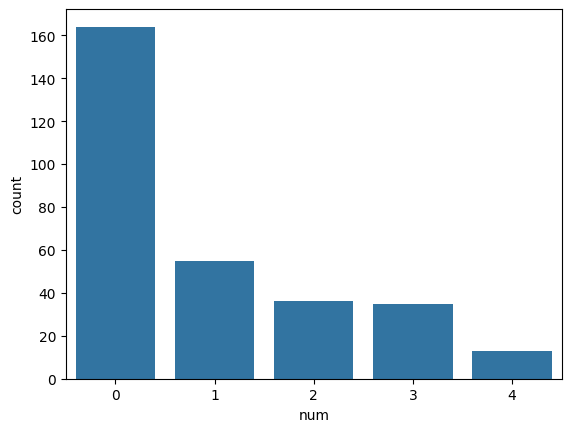

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [24]:
sns.countplot(x="num", data=df)
plt.show()
print(df['num'].value_counts())

Dataset Description: The heart disease dataset contains 303 observations and 14 variables (13 predictors + 1 target). Key details about the data include:

There are 13 predictor features capturing patient information:

5 numerical features: `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.

8 categorical features: `sex` (0 = female, 1 = male), `cp` (chest pain type with 4 categories), `fbs` (fasting blood sugar > 120 mg/dl, binary), `restecg` (resting ECG results, 3 categories), `exang` (exercise-induced angina, binary), `slope` (slope of ST segment, 3 categories), `ca` (number of major vessels colored by fluoroscopy, 0–3, with some missing values), and `thal` (thalassemia defect type, 3 categories, with some missing).

The **target variable** `num` indicates heart disease diagnosis (0 = no disease, 1–4 = levels of disease). We will transform this to binary in the next step. The most of target variable num sperade in 0, and need to transform to binary since the range is 0-4.

There are a few missing values present in `ca` and `thal` features (4 missing in `ca`, 2 in `thal`). Aside from these, all columns are complete. Overall, the dataset is suitable for supervised learning, with a mix of feature types and a binary outcome.

Question 4

In [25]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

print("Value counts for 'num' after transformation:")
print(df['num'].value_counts())

Value counts for 'num' after transformation:
num
0    164
1    139
Name: count, dtype: int64


Question 5

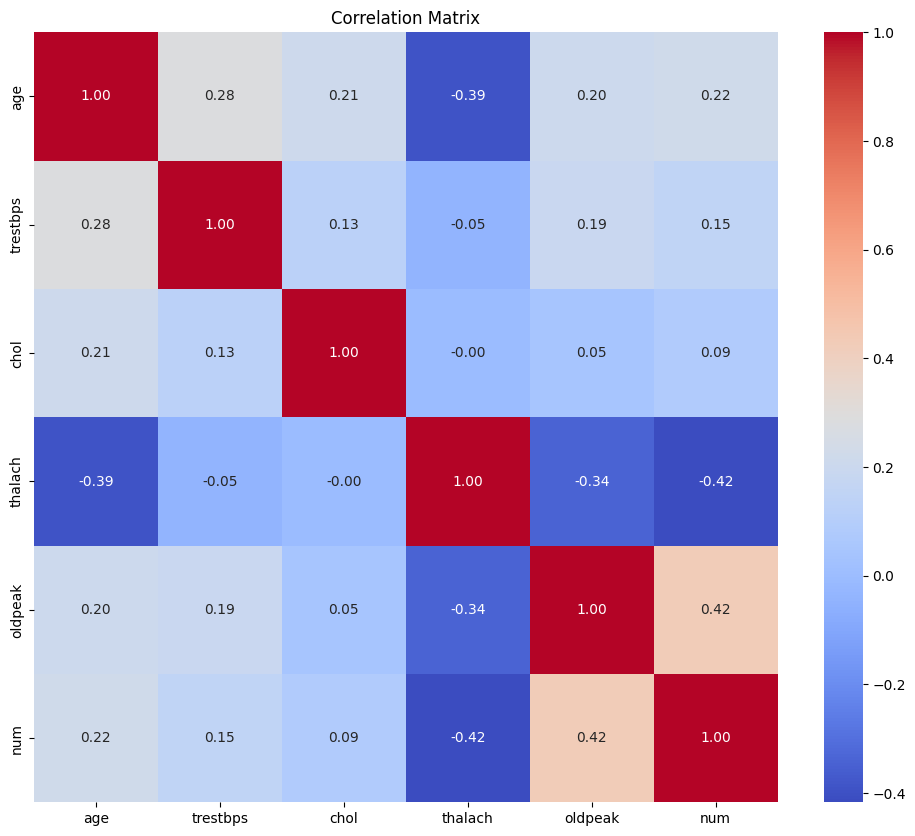

In [26]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
corr = df[numerical_cols + ['num']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The variable `thalach` and `oldpeak` all show significant positive relationships with the presence of heart disease. These variables are likely to contribute meaningful information and should be prioritized during feature selection.

In contrast, variables such as `chol` (serum cholesterol) show very weak correlations with the `target`, indicating they may be less useful for classification and could potentially be excluded to reduce model complexity without sacrificing performance.

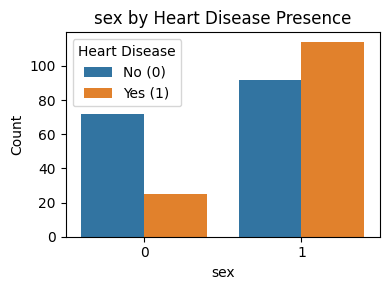

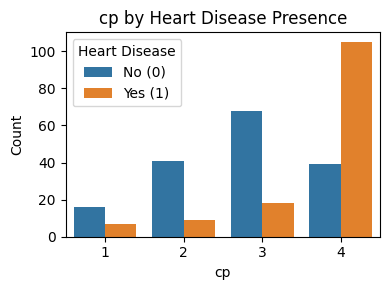

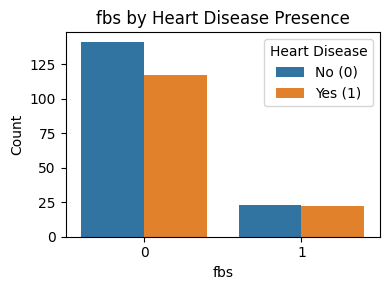

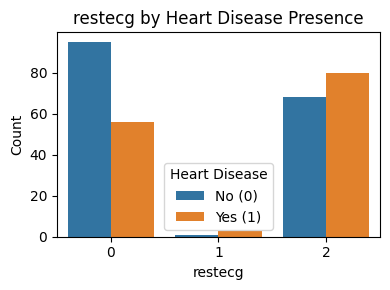

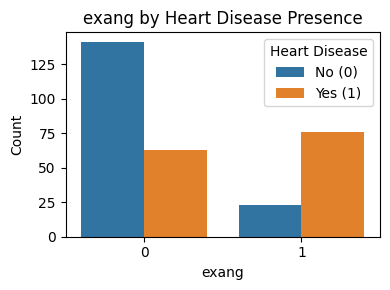

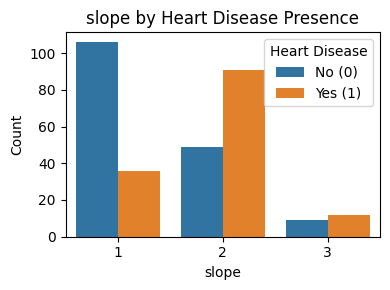

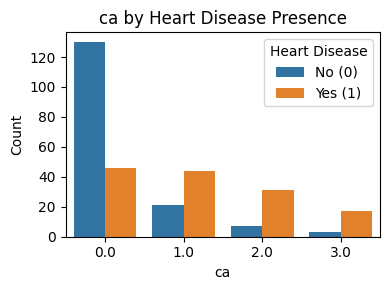

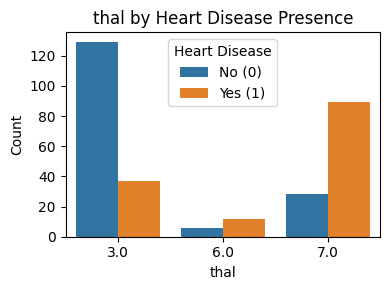

In [27]:
X = df.drop('num', axis=1)
y = df['num']

categorical_feats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_feats:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, hue=y, data=df)
    plt.title(f"{col} by Heart Disease Presence")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease", labels=["No (0)","Yes (1)"])
    plt.tight_layout()
    plt.show()

sex: Males (sex = 1) are more likely to have heart disease than females, as seen by the higher count of diseased males.

cp: Patients with chest pain type 4 (asymptomatic) have a strong association with heart disease, while types 2 and 3 are more common in healthy individuals.

fbs: Fasting blood sugar (fbs) appears to have little impact on heart disease, as both 0 and 1 show similar distributions across disease status.

restecg: A normal ECG (restecg = 0) is more common in healthy individuals, while restecg = 2 (left ventricular hypertrophy) is slightly more frequent among those with heart disease.

exang: Exercise-induced angina (exang = 1) is more common in heart disease patients, whereas those without angina (exang = 0) are more likely to be healthy.

slope: A flat ST slope (slope = 2) is more associated with heart disease, while an upsloping ST segment (slope = 1) is more common in healthy patients.

ca: Patients with a greater number of major vessels colored by fluoroscopy (ca = 1 to 3) are more likely to have heart disease.

thal: Thalassemia values 6 and 7 (fixed or reversible defects) are strongly associated with heart disease, whereas normal thalassemia (thal = 3) is more common in healthy individuals.

Question 6

In [28]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


There are 6 missing values.

In [29]:
df_clean = df.dropna()
print("Number of observations after dropping missing values:", df_clean.shape[0])

Number of observations after dropping missing values: 297


Quesion 7

[0.35943854 0.21824117 0.17492399 0.15254847 0.09484783]
0.5776797094563252


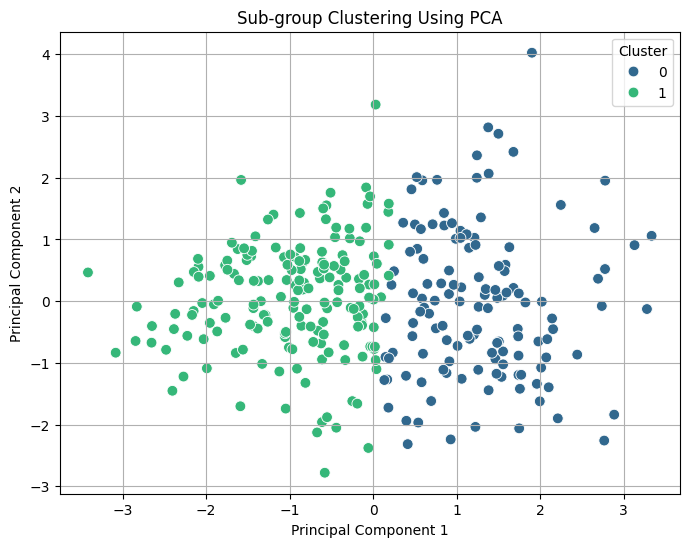

In [30]:
pca = PCA()
pca_result = pca.fit_transform(df[numerical_cols])
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3','PC4','PC5'])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_[:2]))

kmeans = KMeans(n_clusters=2, n_init=20, random_state=1)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Sub-group Clustering Using PCA')
plt.legend(title='Cluster')
plt.grid(True)
#plt.tight_layout()
plt.show()
#print(pca_df['Cluster'].value_counts())

Sub-group Analysis: We apply unsupervised learning to discover natural sub-groups (clusters) in the data without using the class labels or categorical features. We focus on the five continuous features (age, trestbps, chol, thalach, oldpeak), standardize them, and use K-Means clustering to find patient subgroups. To decide the number of clusters, we compute the silhouette score for k=2 to k=5.

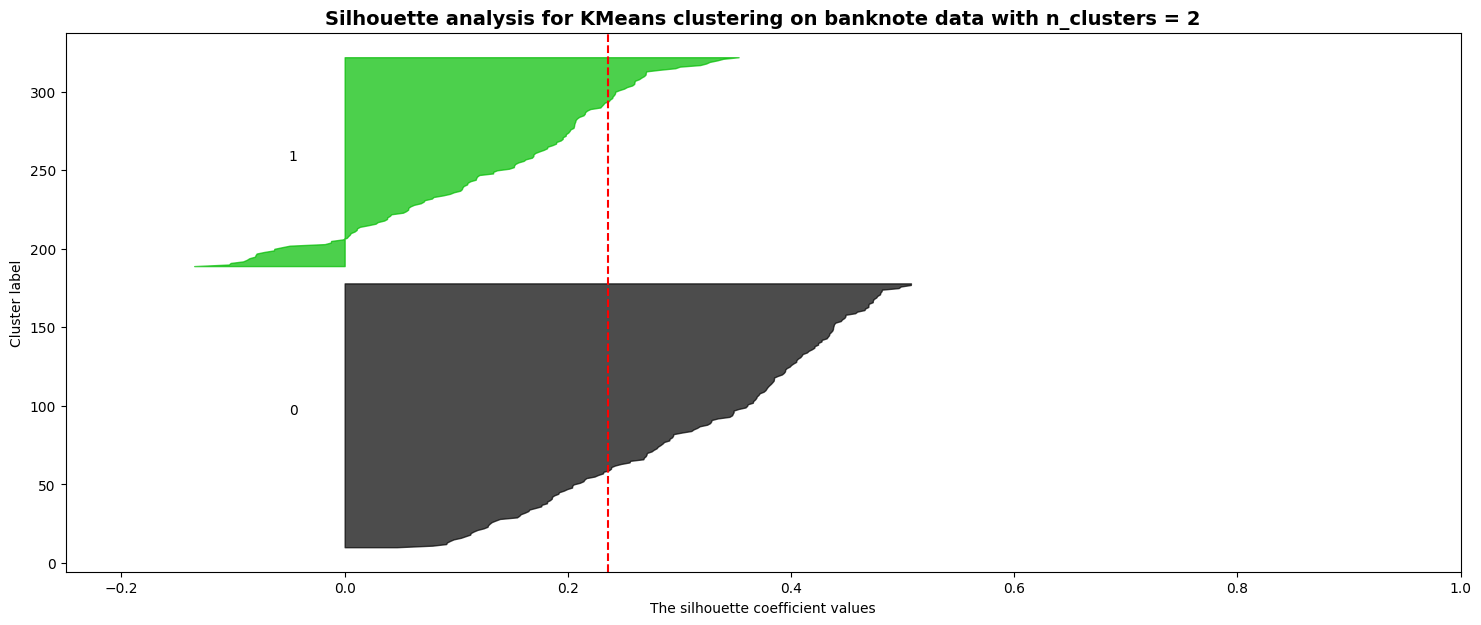

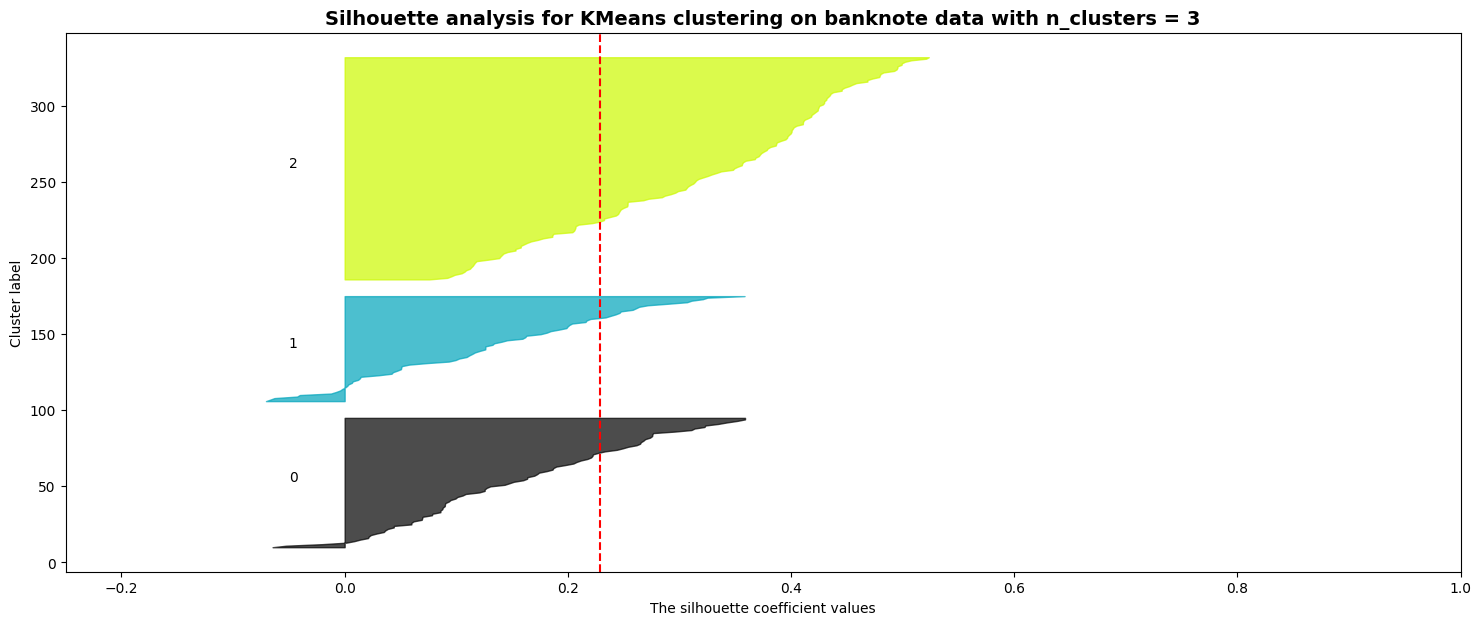

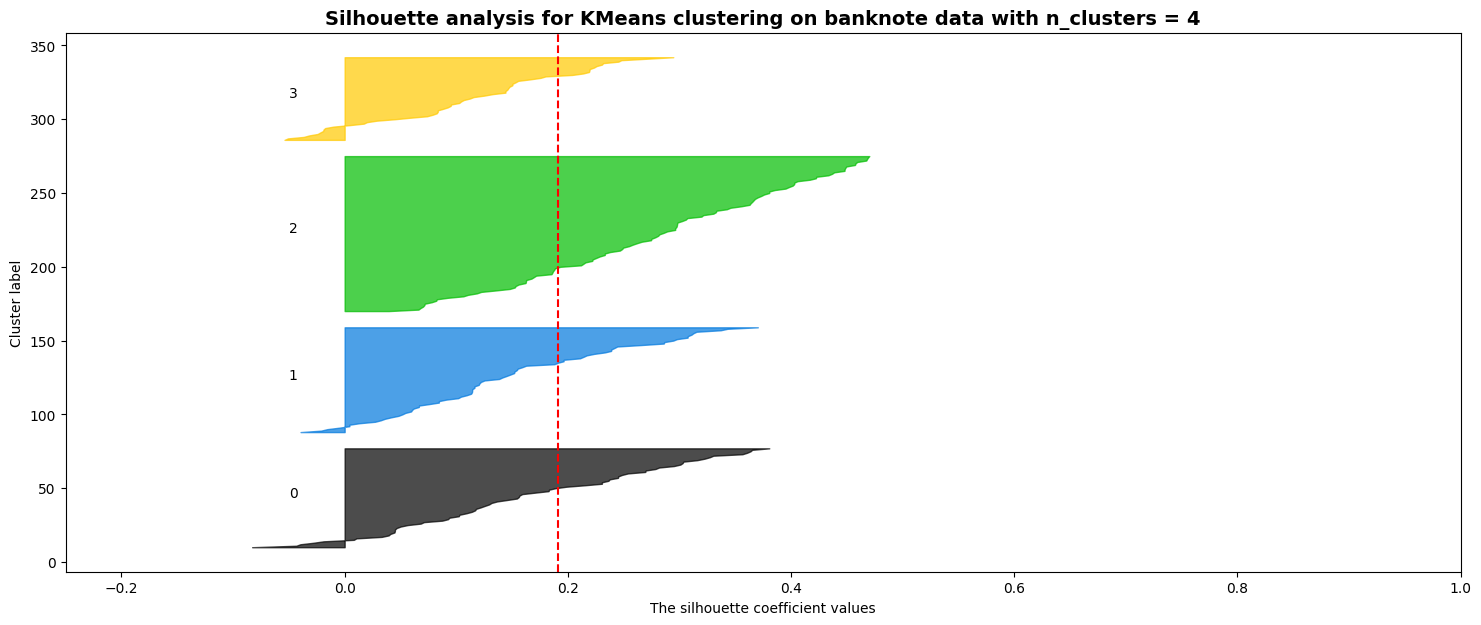

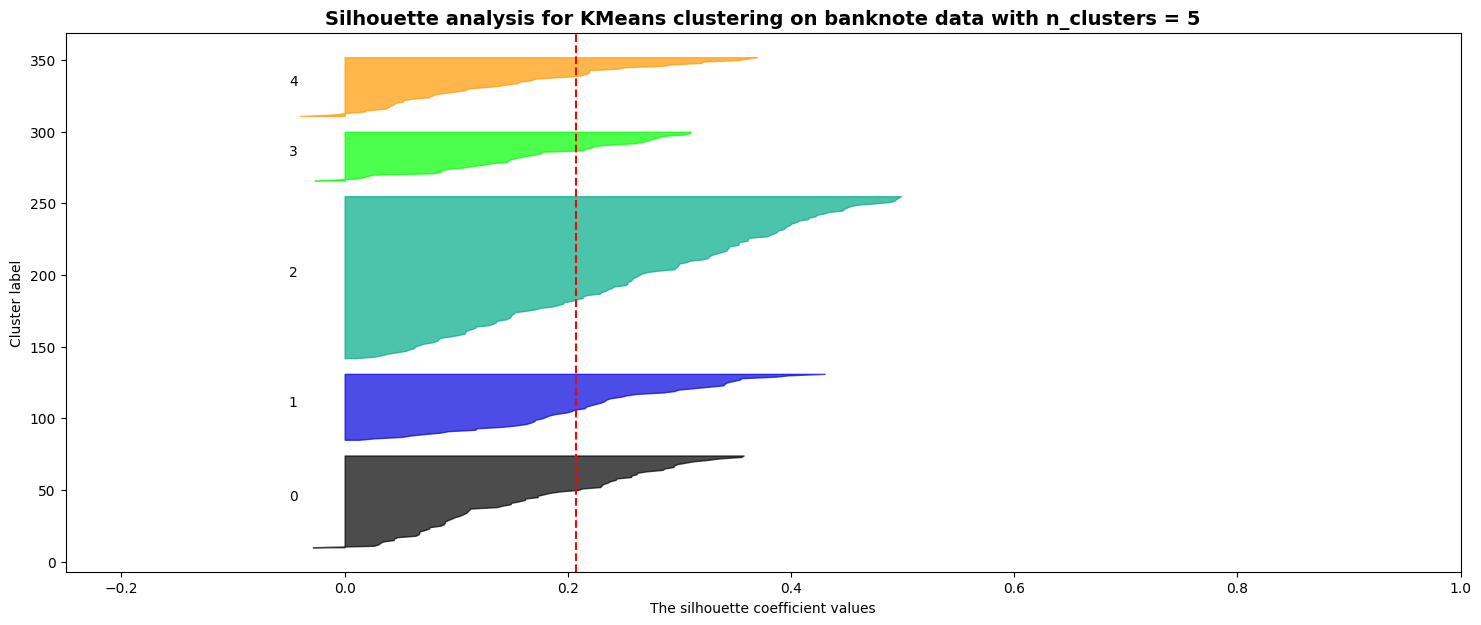

In [31]:
range_n_clusters = range(2, 6)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df[numerical_cols])
    silhouette_avg_km = silhouette_score(df[numerical_cols], cluster_labels_km)

    sample_silhouette_values = silhouette_samples(df[numerical_cols], cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])

    y_lower = 10
    
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on banknote data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

The best k=2 because the average silhouette score is the highest for this value of k. 

Quesion 8

In [32]:
X = df_clean.drop('num', axis=1)
y = df_clean['num']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=1, stratify=y
)
print("Training set size:", X_train.shape[0], "  Testing set size:", X_test.shape[0])
print("Class distribution in training:", y_train.value_counts(normalize=True).to_dict())
print("Class distribution in testing:", y_test.value_counts(normalize=True).to_dict())

Training set size: 207   Testing set size: 90
Class distribution in training: {0: 0.5410628019323671, 1: 0.45893719806763283}
Class distribution in testing: {0: 0.5333333333333333, 1: 0.4666666666666667}


Question 9

**Logistic Regression:** A linear classifier that is simple, fast, and highly interpretable (weights indicate feature influence). Logistic regression works well if the relationship between features and log-odds of the outcome is roughly linear. Given many strong risk factors (e.g., *oldpeak*, etc.), a logistic model can directly model the probability of disease. It also handles binary and continuous features (after dummy encoding) and is less prone to overfitting with fewer parameters. We also choose it for its interpretability – important in medical contexts to understand predictors.

**Random Forest:** An ensemble of decision trees that can capture non-linear interactions between features. Random forests handle heterogeneous feature types naturally and are robust to outliers. Considering our data might have non-linear effects (e.g., extremely high oldpeak might exponentially raise risk), a Random Forest can model such effects better than a linear model. It can also automatically handle feature interactions (e.g., a combination of moderate oldpeak and high chol might indicate risk even if individually moderate). Additionally, Random Forests provide feature importance estimates, which is useful for insight. Given the moderate dataset size (303), a Random Forest can be trained quickly and tends not to overfit if we constrain depth.



Question 10

We will evaluate model performance using two metrics:

`Accuracy`: This is the proportion of correct predictions out of all predictions. Formally,

Accuracy= (TP + TN + FP + FN) / (TP + TN),

where TP is true positives, TN true negatives, FP false positives, and FN false negatives. Accuracy is simple to interpret as the overall success rate of the classifier. However, it can be misleading if the classes are imbalanced.

`F1-Score`: This is the harmonic mean of Precision and Recall, and is given by

F1 = (2 × Precision × Recall) / (Precision + Recall),

where Precision = TP/(TP+FP) and Recall = TP/(TP+FN). The F1-score balances precision and recall, and is useful in binary classification, especially when the class distribution is imbalanced or when false negatives and false positives are both important. A higher F1 indicates a better trade-off between precision and recall.

Queston 11

In [33]:
LogisticRegression(max_iter=1000, random_state=1) 

LogisticRegression(max_iter=1000, random_state=1)

In [34]:
log_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('clf', LogisticRegression(max_iter=1000, random_state=1))
])
log_param_grid = {'clf__C': [0.01, 0.1, 1, 10, 100]}

log_grid = GridSearchCV(log_pipeline, log_param_grid, cv=5, scoring='f1')
log_grid.fit(X_train, y_train)
best_log_model = log_grid.best_estimator_
print("Best Logistic Regression parameters:", log_grid.best_params_)

rf_param_grid = {'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=1), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
print("Best Random Forest parameters:", rf_grid.best_params_)

Best Logistic Regression parameters: {'clf__C': 1}
Best Random Forest parameters: {'max_depth': None, 'n_estimators': 200}


Question 12

In [35]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_cols = X_train.columns[selector.get_support()]
print("Selected top 5 features:", list(selected_cols))


select_pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=1))
])
select_param_grid = {'clf__C': [0.01, 0.1, 1, 10, 100]}

select_grid = GridSearchCV(select_pipeline, select_param_grid, cv=5, scoring='f1')
select_grid.fit(X_train, y_train)
best_select_model = select_grid.best_estimator_
print("Best SelectKBest Logistic parameters:", select_grid.best_params_)

Selected top 5 features: ['thalach', 'sex_1', 'cp_4', 'exang_1', 'thal_7.0']
Best SelectKBest Logistic parameters: {'clf__C': 1}
